In [12]:
import os 
import ants
from nilearn.input_data import NiftiMasker
from matplotlib import pyplot as plt
import numpy as np
import copy

In [54]:
code_root = '/Users/aidasaglinskas/Desktop/BC-CP-Computational-Profiles/'
file = 'allsubs-cid-test1572448402.nii.gz'


fn = os.path.join(code_root,'Results',file)
masker = NiftiMasker()

ds = masker.fit_transform(fn)
anat=ants.image_read(os.path.join(code_root,'Results','avrg_T1w.nii'))
im = ants.image_read(fn)

vec = ds.squeeze()

/Users/aidasaglinskas/opt/anaconda3/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


Text(0.5, 1.0, 'Voxels per Cluster')

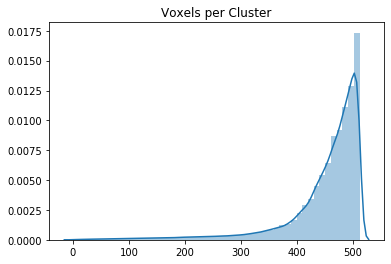

In [7]:
import seaborn as sns
ax = sns.distplot(vec[0:])
ax.set_title('Voxels per Cluster')

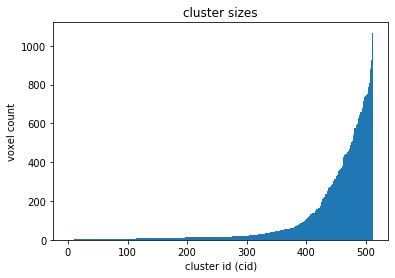

In [79]:
u = np.unique(vec)
plt.hist(vec,bins=len(u));
plt.title('cluster sizes')
plt.ylabel('voxel count');
plt.xlabel('cluster id (cid)');

array([512., 511., 510., 509., 508., 507., 506., 505., 504., 503.])

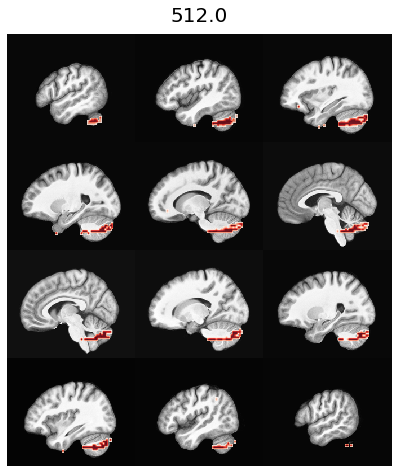

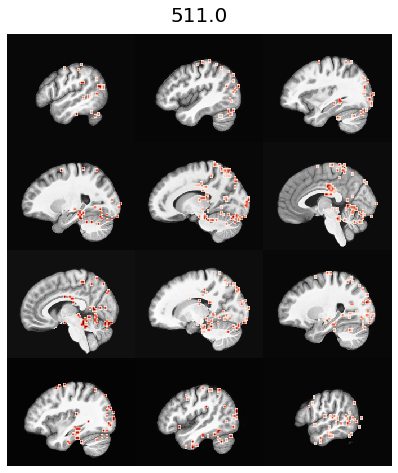

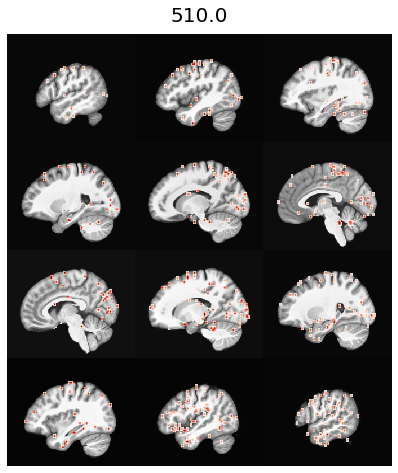

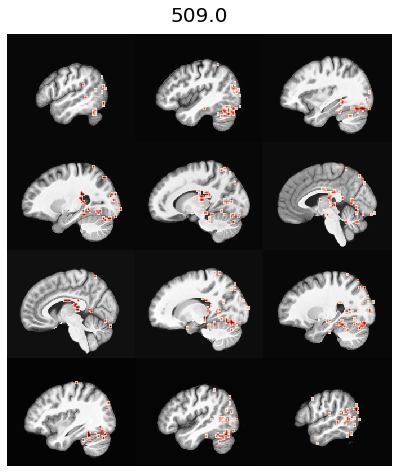

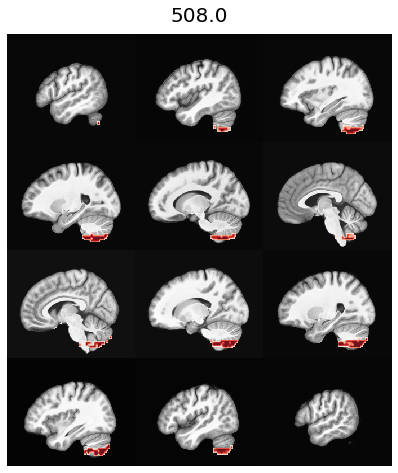

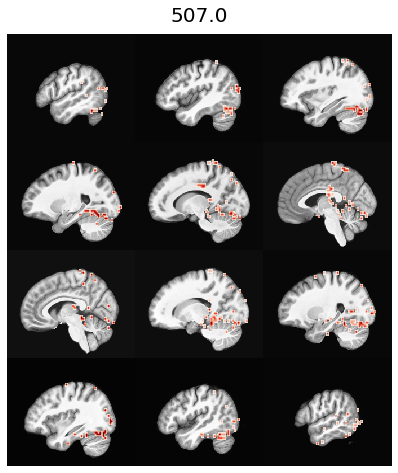

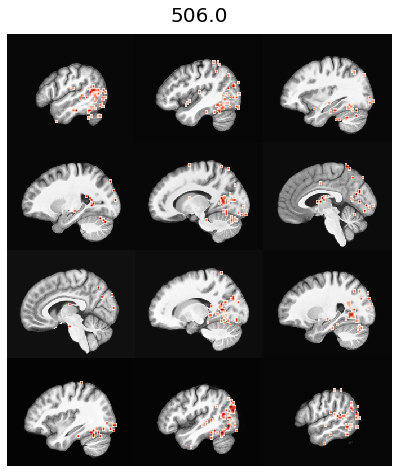

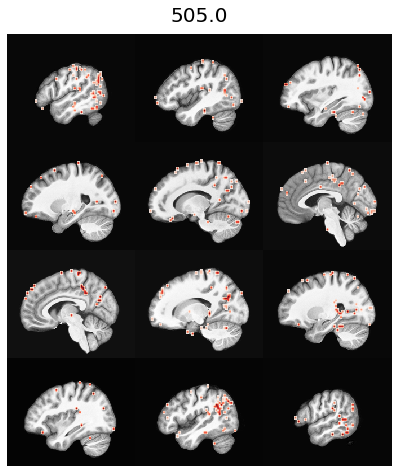

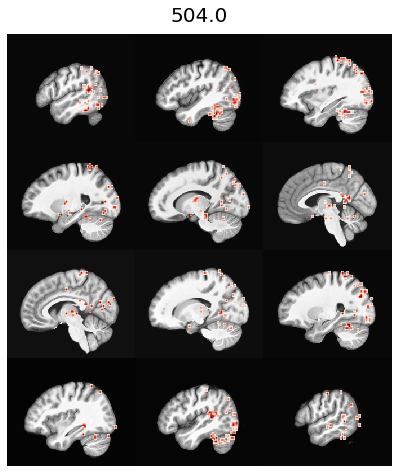

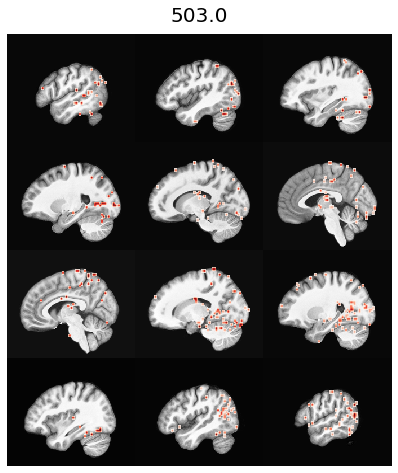

In [82]:
def plot_clust(cid,fn,anat):
    im2 = ants.image_read(fn)
    im2[im2!=cid]=0
    anat.plot(overlay=im2,overlay_cmap='Reds',title='{}'.format(cid))
    
crange = np.arange(np.max(u),np.max(u)-10,-1)

for cid in crange:
    plot_clust(cid,fn,anat)

In [31]:
#ofn = os.path.join(code_root,'Results','out.nii')
#im2.to_filename(ofn)